In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
data = pd.read_csv('IMDB.csv')

# Preprocessing steps
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove special characters, punctuation, and convert to lowercase
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in STOPWORDS])
    return text

# Apply the preprocessing function to the dataset
data['review'] = data['review'].apply(preprocess_text)

# Convert the sentiment labels into binary values (positive = 1, negative = 0)
data['sentiment'] = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Tokenization and padding
tokenizer = Tokenizer(num_words=5000)  # Use the top 5000 words in the corpus
tokenizer.fit_on_texts(data['review'])
X = tokenizer.texts_to_sequences(data['review'])
X = pad_sequences(X, maxlen=200)  # Pad/truncate sequences to length 200

y = data['sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GlobalMaxPooling1D

# Model architecture
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(GlobalMaxPooling1D())  # Global max pooling over time
model.add(Dense(64, activation='relu'))  # Hidden layer with ReLU activation
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.7510 - loss: 0.4958 - val_accuracy: 0.8845 - val_loss: 0.2743
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9075 - loss: 0.2313 - val_accuracy: 0.8867 - val_loss: 0.2743
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9396 - loss: 0.1684 - val_accuracy: 0.8842 - val_loss: 0.2926
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.9610 - loss: 0.1232 - val_accuracy: 0.8810 - val_loss: 0.3253
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.9726 - loss: 0.0892 - val_accuracy: 0.8768 - val_loss: 0.3727


In [5]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8785 - loss: 0.3664
Test Accuracy: 0.876800000667572


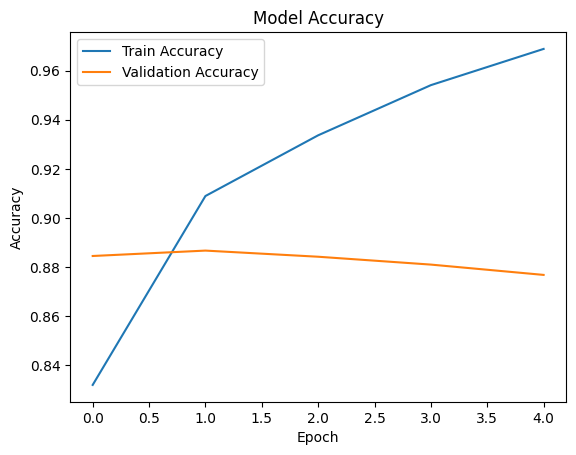

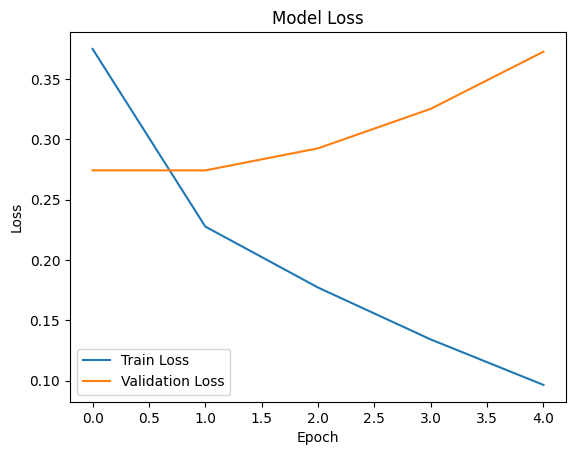

In [6]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



**ReLU Activation :**

ReLU (Rectified Linear Unit) is  used because it introduces non-linearity to the model, which helps it learn complex patterns. Additionally, ReLU helps mitigate the vanishing gradient problem during backpropagation.

**Sigmoid Activation (Output Layer):**

Sigmoid function is suitable for binary classification problems as it outputs values between 0 and 1, which can be interpreted as probabilities for binary labels (0 = negative, 1 = positive).

**Binary Cross-Entropy Loss:**

Binary Cross-Entropy is used for binary classification tasks because it measures the difference between the predicted probabilities and the actual class labels. Minimizing this loss helps improve model performance in tasks where the output is either 0 or 1.


we implemented an ANN for sentiment analysis on the IMDb movie reviews dataset. We used appropriate preprocessing steps, designed an ANN with ReLU and sigmoid activation functions, and evaluated the model's performance. The choice of activation functions and loss function was justified based on their suitability for binary classification and non-linearity handling.
